In [1]:
# All necessary library and package imports

# tabular data manipulation ; I see it as excel on steroids
import pandas as pd

# main plotting library
import matplotlib.pyplot as plt

# numerical calculations
import numpy as np

# machine learning library
from sklearn import datasets

# Principal component analysis
from sklearn.decomposition import PCA

# systems library to manipulate folders/files
import sys

# For the interactive display
from IPython.display import display, Markdown, clear_output

# For the widgets in the interactive display
from ipywidgets import (
    interactive,
    Select,
    Dropdown,
    IntSlider,
    FloatRangeSlider,
    Button,
    VBox,
    HBox,
    Box,
    Tab,
    ToggleButton,
    BoundedIntText,
    Output,
    SelectionRangeSlider,
    Label,
    Text,
)

# to have nice graphs with zoom function in the jupyter notebook
%matplotlib notebook

In [2]:
# for some reason needs to be run twice
%matplotlib notebook

In [3]:
# Add the scripts folder to the python PATH and import my scripts for plotting
sys.path.append("../scripts/")
sys.path.append(".")
from plotter import (
    scatter_plot_color,
    is_datetime,
    create_PCA_figure,
    add_intervals_parity_plot,
    f_save,
    create_widgets_interactive,
)

In [4]:
iris = datasets.load_iris()
df = pd.DataFrame(
    data=np.c_[iris["data"], iris["target"]],
    columns=iris["feature_names"] + ["target"],
)
converter = {0: "setosa", 1: "versicolor", 2: "virginica"}
df["target"] = df["target"].replace(converter)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [14]:
df.loc[:,df.columns.str.contains("petal")]

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [5]:
(
    sliders,
    xas_widget,
    yas_widget,
    color_widget,
    plot_button,
    save_button,
    figure_name,
    grid_button,
    add_interval_button,
    marker_size_input,
    figure_title,
    xlim_min_widget,
    xlim_max_widget,
    ylim_min_widget,
    ylim_max_widget,
    tab,
) = create_widgets_interactive(df)
# print(
#     sliders,
#     xas_widget,
#     yas_widget,
#     color_widget,
#     plot_button,
#     save_button,
#     figure_name,
#     grid_button,
#     add_interval_button,
#     marker_size_input,
#     xlim_widget,
#     ylim_widget,
#     tab,
# )

In [8]:
def update_plot(
    df,
    sliders,
    xas_widget,
    yas_widget,
    color_widget,
    grid_button,
    marker_size_input,
    add_interval_button,
    figure_title,
    xlim_min_widget,
    xlim_max_widget,
    ylim_min_widget,
    ylim_max_widget,
):
    global f
    df_copy = df.copy()
    
    for col in sliders:
        minn = sliders[col].value[0]
        maxx = sliders[col].value[1]
        filter_upper = df_copy[col] <= maxx
        filter_downer = df_copy[col] >= minn
        df_copy = df_copy[filter_upper]
        df_copy = df_copy[filter_downer]
        
    f, ax = plt.subplots()
    plt.ion()
    xas = xas_widget.value
    yas = yas_widget.value
    coloring = color_widget.value
    grid = grid_button.value
    markersize = marker_size_input.value
    add_intervals = add_interval_button.value 
    
    scatter_plot_color(
        f,
        ax,
        df_copy,
        xas,
        yas,
        coloring,
        markersize,
    )
    
    if not pd.api.types.is_datetime64_dtype(xas): 
        ax.set(
            xlim=(xlim_min_widget.value, xlim_max_widget.value),    
        )
    
    if not pd.api.types.is_datetime64_dtype(yas):
        ax.set(
            ylim=(ylim_min_widget.value, ylim_max_widget.value),
        )
        
    if figure_title.value != "figure_title":
        ax.set(
            title=figure_title.value,
        )
    
    if add_intervals:
        add_intervals_parity_plot(ax)
    
    ax.grid(grid)

    f.tight_layout()
    
    return f

<IPython.core.display.Javascript object>


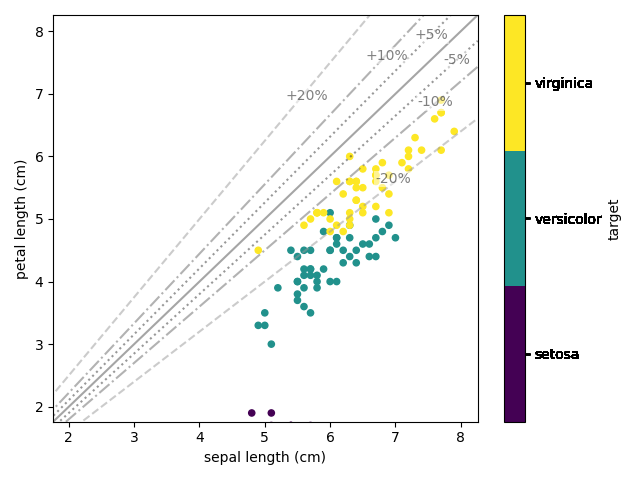

In [10]:
taskbar = VBox(children=[
    tab,
    HBox(children=[plot_button, figure_title,]),
    HBox(children=[save_button, figure_name]),
])

@plot_button.on_click
def plot_on_click(b):
    clear_output()
    display(taskbar)
    update_plot(  
        df,
        sliders,
        xas_widget,
        yas_widget,
        color_widget,
        grid_button,
        marker_size_input,
        add_interval_button,
        figure_title,
        xlim_min_widget,
        xlim_max_widget,
        ylim_min_widget,
        ylim_max_widget,
    )
    
@save_button.on_click
def save_fig(b):
    global f
    f_name = figure_name.value
    f_save(f, f_name)
    
display(taskbar)

# Time series

In [ ]:
df = pd.read_csv('http://bit.ly/30iosS6', parse_dates=['date'])
df.head()

In [ ]:
df.plot()

In [ ]:
# Make an updateable plot structure
xas_widget = Dropdown(
    options=list(df.columns),
    description='x-axis',
    value=df.columns[0]
)
yas_widget = Dropdown(
    options=list(df.columns),
    description='y-axis',
    value=df.columns[1]
)
color_widget = Dropdown(
    options=list(df.columns),
    description='coloring',
    value=df.columns[1]
)

def update_plot(**kwargs):
    f, ax = plt.subplots()
    plt.ion()
    xas = xas_widget.value
    yas = yas_widget.value
    coloring = color_widget.value
    scatter_plot_color(
        f,
        ax,
        df,
        xas,
        yas,
        coloring,
    )
    
interactive(
    update_plot,
    xas=xas_widget,
    yas=yas_widget,
    coloring=color_widget
)

In [ ]:
def on_value_change(change):
    print(df[change["new"]])
    int2.value = df[change["new"]].min(), df[change["new"]].max()

In [ ]:
df[::10]